In [23]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# solve LP
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=0)
m.Equations([13/6*x+y<=13,x+4*y<=20,x>=0,y>=0])
m.Maximize(x+y)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x = ',xopt,' y = ',yopt)
print('z = ',xopt+yopt)

x =  4.1739131143  y =  3.9565215287
z =  8.130434643000001


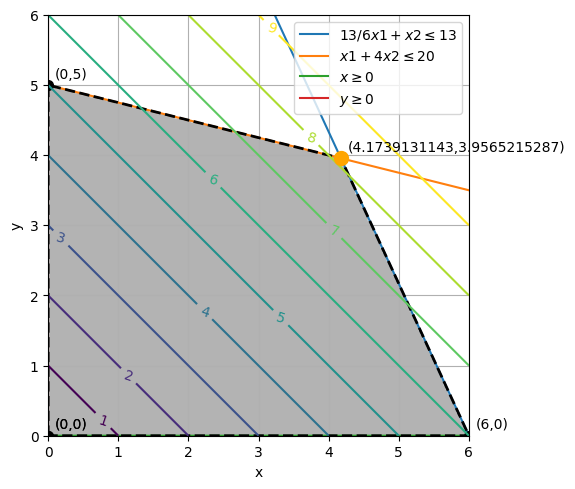

In [24]:
# visualize solution
g = np.linspace(0,6,200)
x,y = np.meshgrid(g,g)
obj = x+y
plt.imshow(((13/6*x+y<=13)&(x+4*y<=20)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 6, 2000)
y0 = 13-(13/6)*x0   # 6*x+4*y<=24
y1 = 5-0.25*x0   # x+2*y<=6
y2 = x0*0       # -x+y<=1
y3 = x0*0 # y <= 2

plt.plot(x0, y0, label=r'$13/6x1+x2\leq13$')
plt.plot(x0, y1, label=r'$x1+4x2\leq20$')


plt.plot(x0, y3, label=r'$x\geq0$')
plt.plot([0,0],[0,6], label=r'$y\geq0$')
xv = [0,0,xopt,6,0]; yv = [0,5,yopt,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(1,10))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([xopt],[yopt],marker='o',color='orange',markersize=10)
plt.xlim(0,6); plt.ylim(0,6); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.savefig('plot.png',dpi=300)
plt.show()